In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
%matplotlib inline

In [2]:
# read cars and notcars data
cars = glob.glob('vehicles/**/*.png', recursive=True)
notcars = glob.glob('non-vehicles/**/*.png', recursive=True)

In [3]:
import random
random.shuffle(cars)
random.shuffle(notcars)

images are: <class 'numpy.ndarray'> with dimesions: (64, 64, 3)
number of cars:  8792
number of notcars:  8968


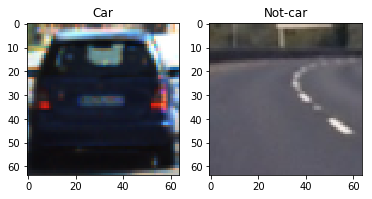

In [4]:
# Show two random car and notcar images
car_index = np.random.randint(0, len(cars))
notcar_index = np.random.randint(0, len(notcars))
# Read images
car_image = mpimg.imread(cars[car_index])
notcar_image = mpimg.imread(notcars[notcar_index])

# dimension
print('images are:', type(car_image), 'with dimesions:', car_image.shape)
# number of samples
n_cars = len(cars)
n_notcars = len(notcars)
print("number of cars: ",n_cars)
print("number of notcars: ",n_notcars)

plt.subplot(1,2,1)
plt.imshow(car_image)
plt.title('Car')
plt.subplot(1,2,2)
plt.imshow(notcar_image)
plt.title('Not-car')

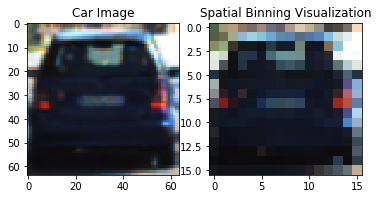

In [5]:
# Spatial Binning Visualization
image = mpimg.imread(cars[car_index])
spatial_bin_img = cv2.resize(image, (16,16))
fig = plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Car Image')
plt.subplot(1,2,2)
plt.imshow(spatial_bin_img, cmap='gray')
plt.title('Spatial Binning Visualization')

# fig.savefig('output_images/spatial_binning.jpg')

## Color Histogram Visualization

bin_edges [   0.   16.   32.   48.   64.   80.   96.  112.  128.  144.  160.  176.
  192.  208.  224.  240.  256.]
bin_centers [   8.   24.   40.   56.   72.   88.  104.  120.  136.  152.  168.  184.
  200.  216.  232.  248.]


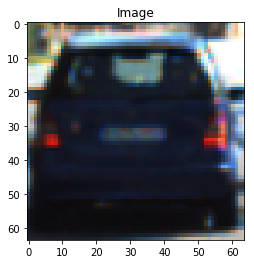

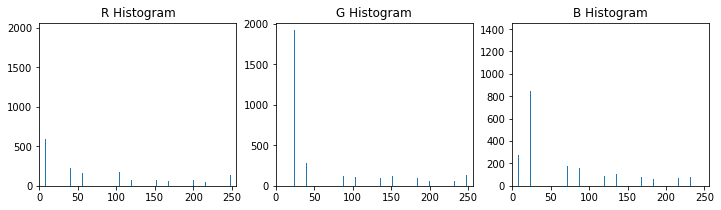

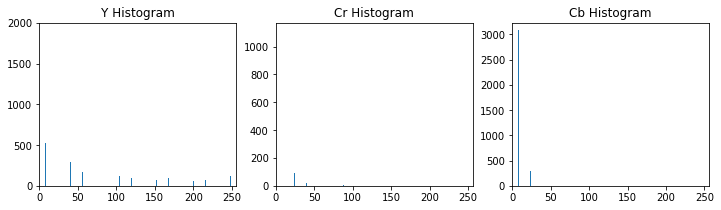

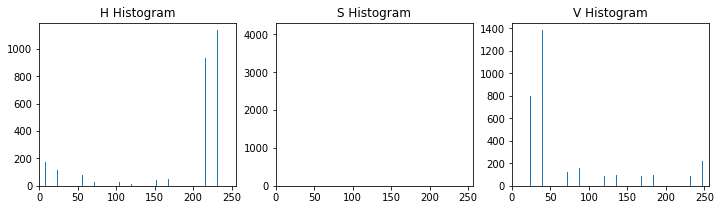

In [6]:
plt.title('Image')
plt.imshow(image, cmap='gray')
# normalize the image
if image.max() <= 1:
    image = image*(255.0)

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=16, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=16, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=16, range=(0, 256))

#print(image[:,:,0].ravel())
# Generating bin centers
bin_edges = rhist[1]
print('bin_edges', bin_edges)
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
print('bin_centers', bin_centers)

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')


# Take histograms in Y, Cr, and Cb
YCrCb_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
Yhist = np.histogram(YCrCb_image[:,:,0], bins=16, range=(0, 256))
Crhist = np.histogram(YCrCb_image[:,:,1], bins=16, range=(0, 256))
Cbhist = np.histogram(YCrCb_image[:,:,2], bins=16, range=(0, 256))

# Generating bin centers
bin_edges = Yhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, Yhist[0])
plt.xlim(0, 256)
plt.title('Y Histogram')
plt.subplot(132)
plt.bar(bin_centers, Crhist[0])
plt.xlim(0, 256)
plt.title('Cr Histogram')
plt.subplot(133)
plt.bar(bin_centers, Cbhist[0])
plt.xlim(0, 256)
plt.title('Cb Histogram')


# Take histograms in H, S, and V
HSV_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
Hhist = np.histogram(HSV_image[:,:,0], bins=16, range=(0, 256))
Shist = np.histogram(HSV_image[:,:,1], bins=16, range=(0, 256))
Vhist = np.histogram(HSV_image[:,:,2], bins=16, range=(0, 256))

# Generating bin centers
bin_edges = Hhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, Hhist[0])
plt.xlim(0, 256)
plt.title('H Histogram')
plt.subplot(132)
plt.bar(bin_centers, Shist[0])
plt.xlim(0, 256)
plt.title('S Histogram')
plt.subplot(133)
plt.bar(bin_centers, Vhist[0])
plt.xlim(0, 256)
plt.title('V Histogram')

## HOG Visualization

/home/yiou/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


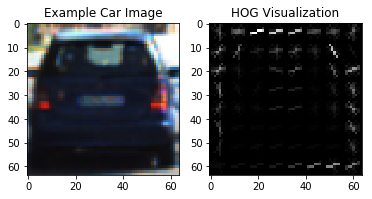

In [7]:
from skimage.feature import hog

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Read in the image
image = mpimg.imread(cars[car_index])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)
# Plot the examples
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

## Feature Extraction

In [8]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

def get_features(color_space = 'YCrCb', orient = 9, pix_per_cell = 8, cell_per_block = 2, 
                 hog_channel = "ALL", spatial_size = (16, 16), hist_bins = 16, spatial_feat = True, 
                 hist_feat = True, hog_feat = True, bins_range=(0,1)):
    
    car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    
    notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    
    return car_features, notcar_features

## Parameters of Feature Extraction

In [9]:
xy_overlap = (0.8, 0.8)
xy_window = [64,64]
y_start_stop = [400, 600] # Min and max in y to search in slide_window()
x_start_stop = [760, 1260]

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

In [10]:
#Extracting Features
car_features, notcar_features = get_features(color_space, orient, pix_per_cell, cell_per_block,
                                             hog_channel, spatial_size, hist_bins, spatial_feat,
                                             hist_feat, hog_feat)

/home/yiou/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [11]:
# np.savetxt('car_features.txt', car_features)
# np.savetxt('notcar_features.txt', notcar_features)

In [12]:
# car_features = np.loadtxt('car_features.txt')
# notcar_features = np.loadtxt('notcar_features.txt')

## Feature Visualization

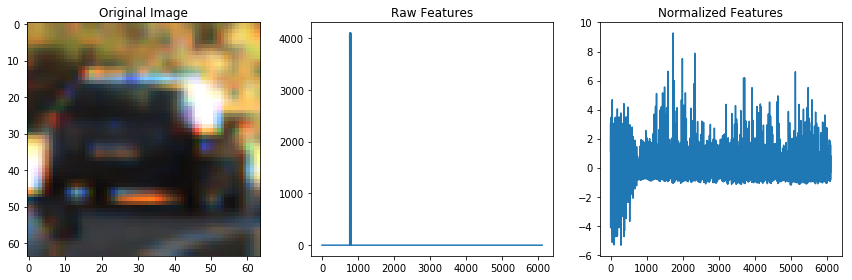

In [11]:
from sklearn.preprocessing import StandardScaler

car_index = 500
#Display of extracted features
if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features[:1000], notcar_features[:1000])).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_index]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_index])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_index])
    plt.title('Normalized Features')
    fig.tight_layout()
    fig.savefig('output_images/raw_and_normalized_features.jpg')
else: 
    print('Your function only returns empty feature vectors...')

## Train SVM

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time

def train_classifier(car_features, notcar_features, spatial_size, hist_bins):
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    X_scaler = StandardScaler().fit(X)
    scaled_X = X_scaler.transform(X)
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(
        scaled_X, y, test_size=0.2, random_state=rand_state)

    print('Using spatial binning of:',spatial_size,
          'and', hist_bins,'histogram bins')
    print('Feature vector length:', len(X_train[0]))

    svc = LinearSVC()

    t=time.time()
    svc.fit(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
    t=time.time()
    n_predict = 10
    print('SVC predicts: ', svc.predict(X_test[0:n_predict]))
    print('For these',n_predict, 'labels: ', y_test[0:n_predict])
    t2 = time.time()
    print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')
    return svc

In [13]:
print(len(car_features))
print(len(notcar_features))

8792
8968


In [14]:
svc = train_classifier(car_features[:3000], notcar_features[:3000], spatial_size, hist_bins)

Using spatial binning of: (16, 16) and 16 histogram bins
Feature vector length: 6108
15.67 Seconds to train SVC...
Test Accuracy of SVC =  0.9892
SVC predicts:  [ 0.  1.  0.  0.  0.  1.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  0.  0.  0.  1.  0.  0.  1.  1.]
0.00909 Seconds to predict 10 labels with SVC


## Sliding Window Implementation

In [15]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.7, 0.7)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

def average_slide_windows(image, x_start_stop=[None, None], y_start_stop=y_start_stop, xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    windows = []
    for xy in [75, 96, 140]:
        if xy < 128:
            window = slide_window(image, x_start_stop=x_start_stop, y_start_stop=[400, 500], 
                        xy_window=(xy, xy), xy_overlap=xy_overlap)
        else:
            window = slide_window(image, x_start_stop=x_start_stop, y_start_stop=[400, 600], 
                        xy_window=(xy, xy), xy_overlap=xy_overlap)
        windows += window
    return windows

In [16]:
image = mpimg.imread('test1.jpg')
image = image.astype(np.float32)/255
draw_image = np.copy(image)

X = np.vstack((car_features[:1000], notcar_features[:1000])).astype(np.float64)                        
X_scaler = StandardScaler().fit(X)
scaled_X = X_scaler.transform(X)

windows = average_slide_windows(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop,
                                xy_window=(64, 64), xy_overlap=(0.85, 0.85))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                          

/home/yiou/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


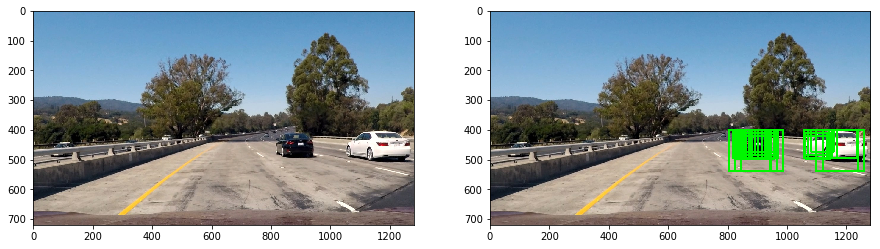

In [17]:
window_img = draw_boxes(draw_image, hot_windows, color=(0, 10, 0), thick=6)  

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(window_img)
plt.imsave("window_img.jpg", window_img)

## Heatmap

In [18]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,50,255), 6)
    # Return the image
    return img

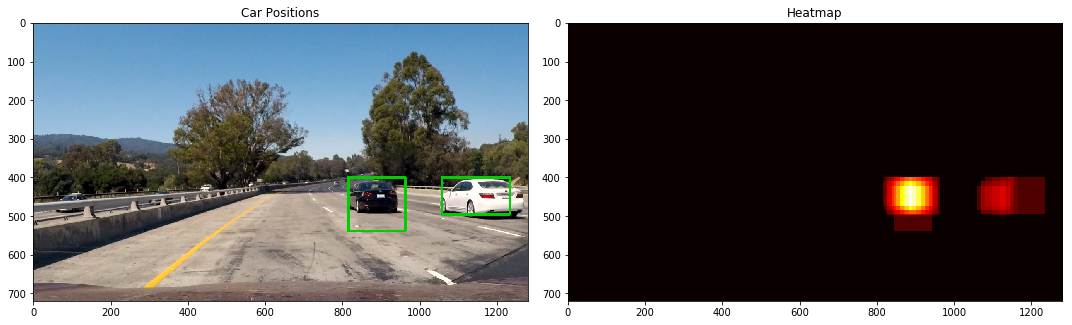

In [19]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(image[:,:,0]).astype(np.float)
# Add heat to each box in box list
heat = add_heat(heat,hot_windows)
    
# Apply threshold to help remove false positives
heatmap = apply_threshold(heat,2)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(draw_img)
plt.imsave("draw_img.jpg", draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heatmap')
fig.tight_layout()

## Tracking Pipeline

In [20]:
from collections import deque
heatmap_history = deque(maxlen = 5) # record history of heatmap to stablize the windows

def add_multiple_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for boxes in bbox_list:
        for box in boxes:
            # Add += 1 for all pixels inside each bbox
            # Assuming each "box" takes the form ((x1, y1), (x2, y2))
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    

def processing_pipeline(img):
    
    image_copy = np.copy(img)
    image_copy = image_copy.astype(np.float32)/255
    draw_image = np.copy(image_copy)

    windows = average_slide_windows(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop,
                                    xy_window=(75, 75), xy_overlap=(0.85, 0.85))

    hot_windows = search_windows(image_copy, windows, svc, X_scaler, color_space=color_space, 
                                 spatial_size=spatial_size, hist_bins=hist_bins, 
                                 orient=orient, pix_per_cell=pix_per_cell, 
                                 cell_per_block=cell_per_block, 
                                 hog_channel=hog_channel, spatial_feat=spatial_feat, 
                                 hist_feat=hist_feat, hog_feat=hog_feat)      
    
    heatmap_history.append(hot_windows)
    
    # window_img = draw_boxes(draw_image, heatmap_history, color=(0, 10, 0), thick=6)

    heat = np.zeros_like(draw_image[:,:,0]).astype(np.float)
    heat = add_multiple_heat(heat, heatmap_history)
    heatmap = apply_threshold(heat,3)
    
    labels = label(heatmap)
    result = draw_labeled_bboxes(np.copy(img), labels)    
    return result

In [21]:
# test pipeline
image1 = mpimg.imread('test1.jpg')
image2 = mpimg.imread('test2.jpg')
image3 = mpimg.imread('test3.jpg')
image4 = mpimg.imread('test4.jpg')
image5 = mpimg.imread('test5.jpg')
image6 = mpimg.imread('test6.jpg')

result1 = processing_pipeline(image1)
result2 = processing_pipeline(image2)
result3 = processing_pipeline(image3)
result4 = processing_pipeline(image4)
result5 = processing_pipeline(image5)
result6 = processing_pipeline(image6)


/home/yiou/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


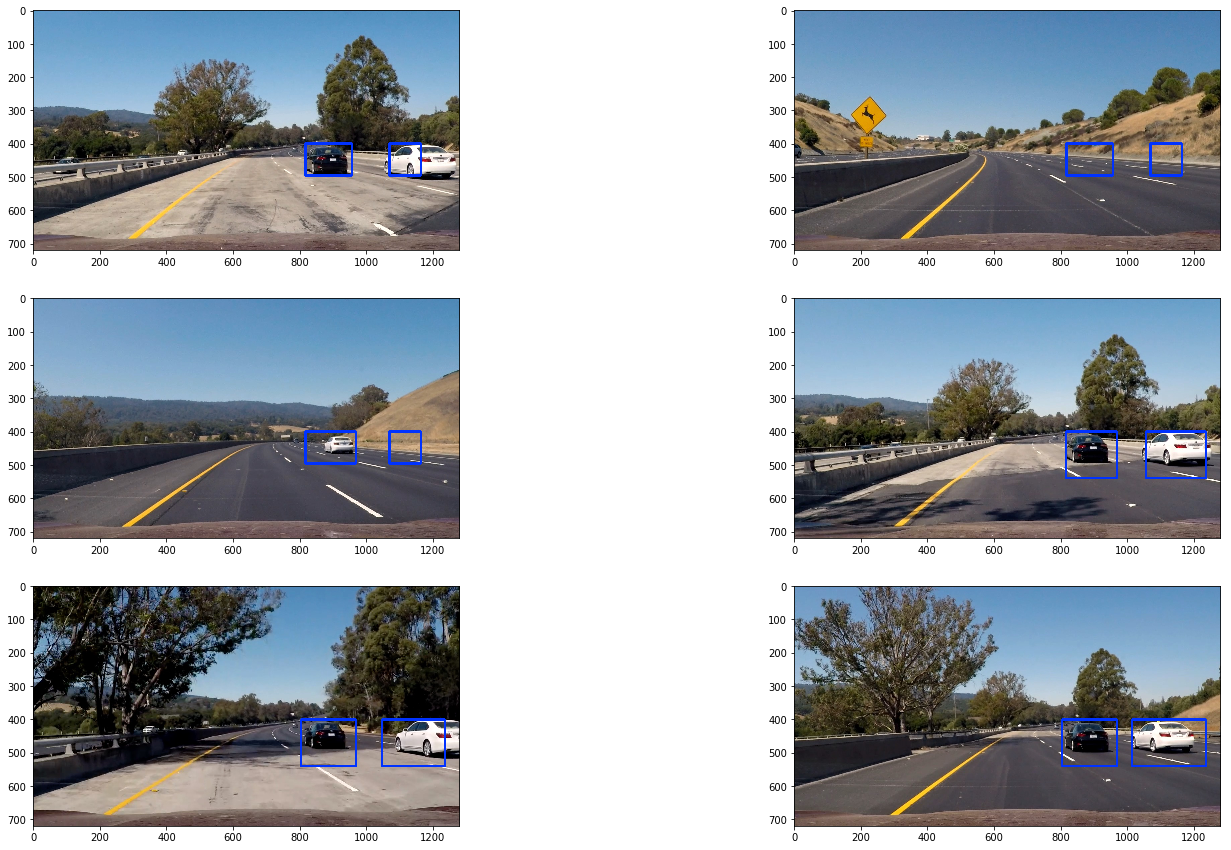

In [22]:
fig = plt.figure(figsize=(25,15))
plt.subplot(321)
plt.imshow(result1)
plt.subplot(322)
plt.imshow(result2)
plt.subplot(323)
plt.imshow(result3)
plt.subplot(324)
plt.imshow(result4)
plt.subplot(325)
plt.imshow(result5)
plt.subplot(326)
plt.imshow(result6)

## Video

In [23]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

project_video_processed = 'video_output.mp4'
video = VideoFileClip("project_video.mp4")
processed_clip = video.fl_image(processing_pipeline)
processed_clip.write_videofile(project_video_processed, audio=False)

[MoviePy] >>>> Building video video_output.mp4
[MoviePy] Writing video video_output.mp4


100%|█████████▉| 1260/1261 [31:47<00:01,  1.48s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: video_output.mp4 



In [24]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_video_processed))